<a href="https://colab.research.google.com/github/YeisonAndreyLiCe/machine_learning_classification/blob/main/visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.compose import make_column_selector
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("seaborn")

In [ ]:
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (20, 9.4)

colors = ["#0466C8","#0353A4","#023E7D","#002855",
          "#001845","#001233","#33415C","#5C677D",
          "#7D8597","#979DAC","#CAF0F8","#ADE8F4",
          "#90E0EF","#48CAEA","#00B4D8","#0096C7",
          "#0077B6"]

font_title = {"size":20, "color":"#114B5F"}
font_label = {'color':  '#114B5F','size': 16}

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/coding_dojo/data_science/classification_project/data/processed/df_cleaned.csv")
df.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type
0,user_3311,47,40,0,Missing,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A
1,user_1972,107,99,0,India,11,1504291325,304.186,203.842,beginner,1439050893,prob_75,2,A
2,user_3317,735,715,0,Vietnam,9,1484278246,419.438,353.211,intermediate,1421847147,prob_75,2,A
3,user_2412,169,159,0,Missing,2,1505569083,345.757,345.757,intermediate,1429008478,prob_75,1,A
4,user_872,113,95,0,Bangladesh,7,1504977695,314.220,89.163,beginner,1480081730,prob_75,1,A


In [ ]:
num_features = make_column_selector(dtype_include="number")(df)
num_features

['submission_count',
 'problem_solved',
 'contribution',
 'follower_count',
 'last_online_time_seconds',
 'max_rating',
 'rating',
 'registration_time_seconds',
 'attempts_range']

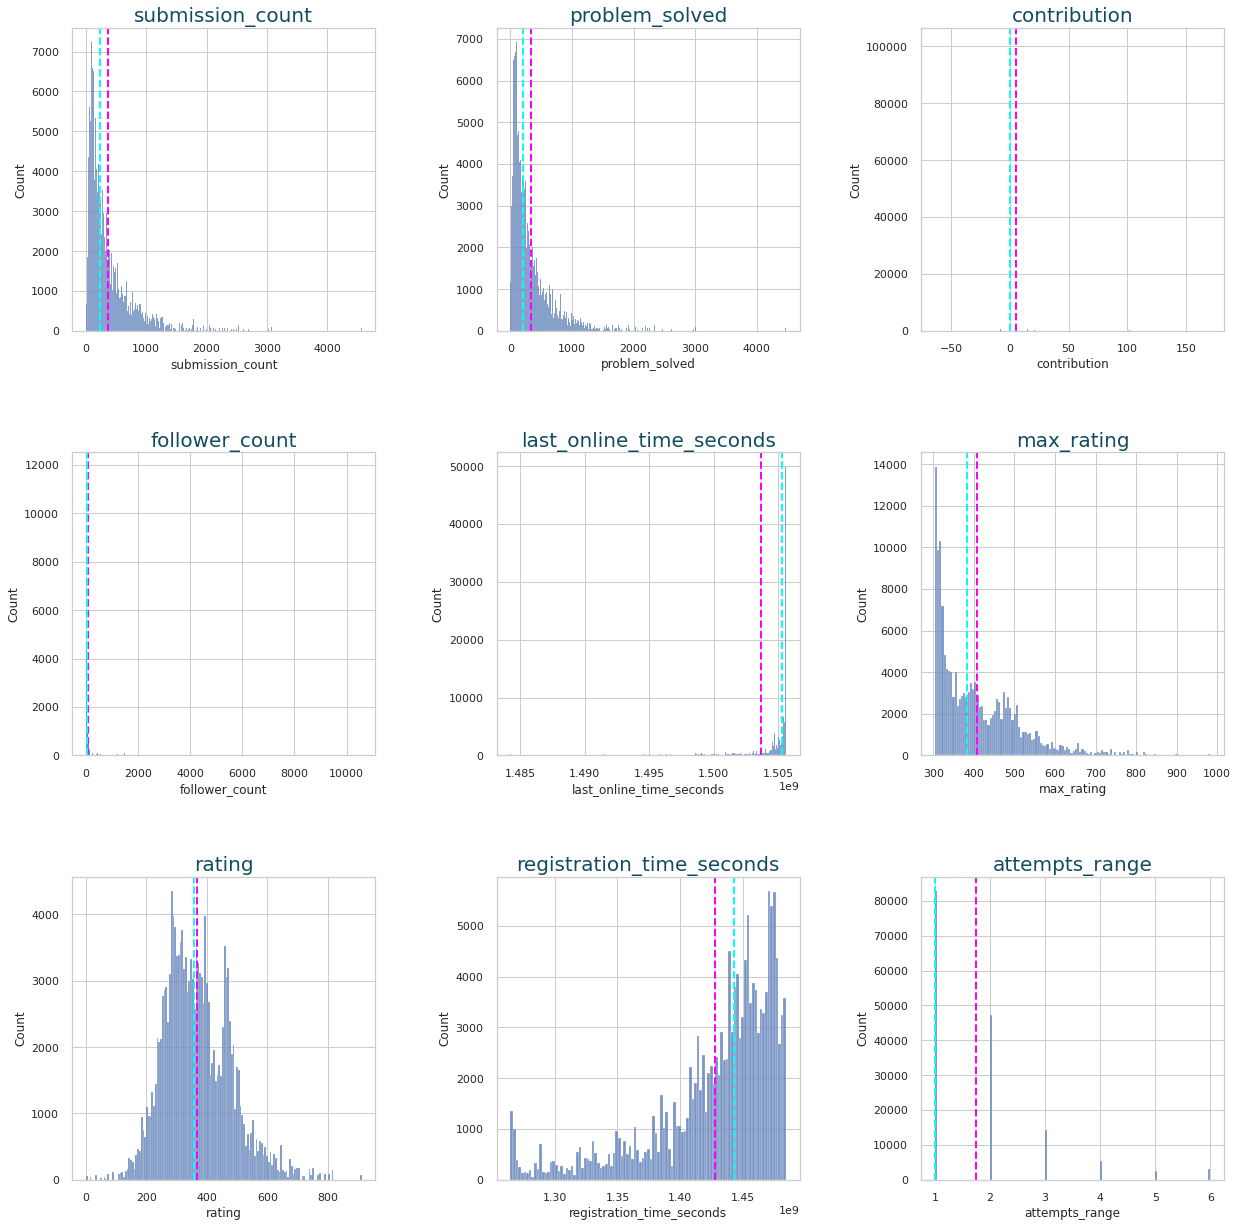

In [ ]:
fig = plt.figure(figsize=(20,20))
for i in range(len(num_features)):
    ax = fig.add_subplot(3,3,i+1)
    sns.histplot(
        ax= ax,
        data=df,
        x=num_features[i]
     )
    ax.set_title(num_features[i], fontdict=font_title, size = 20)
    ax.axvline(df[num_features[i]].mean(), color='magenta', linestyle='dashed', linewidth=2) # mean
    ax.axvline(df[num_features[i]].median(), color='cyan', linestyle='dashed', linewidth=2) # median

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
plt.show()


In [ ]:
cat_features = ['country', 'rank', 'level_type']

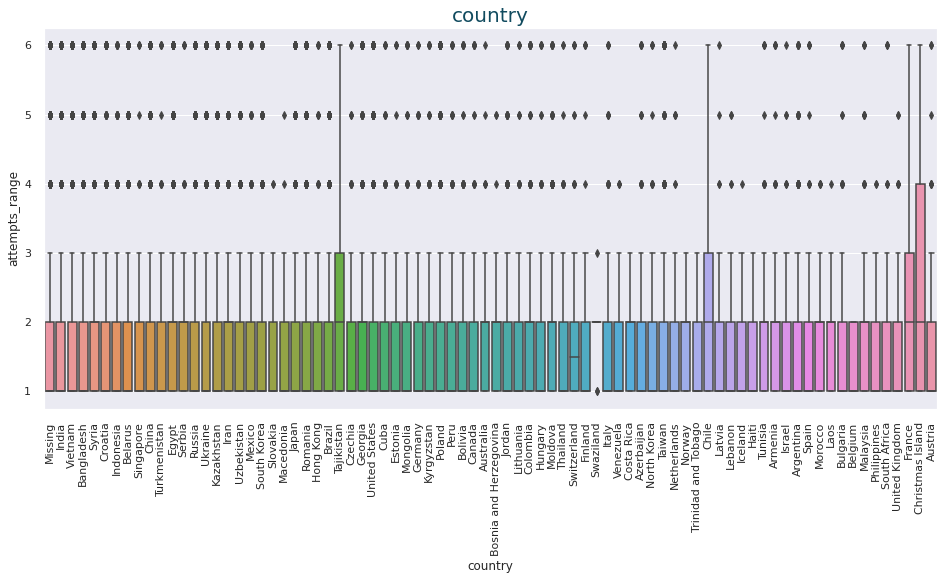

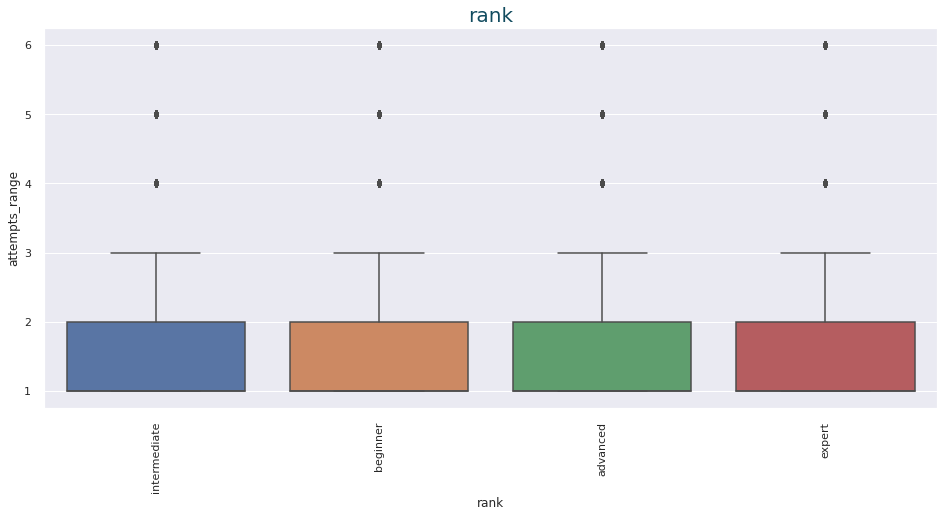

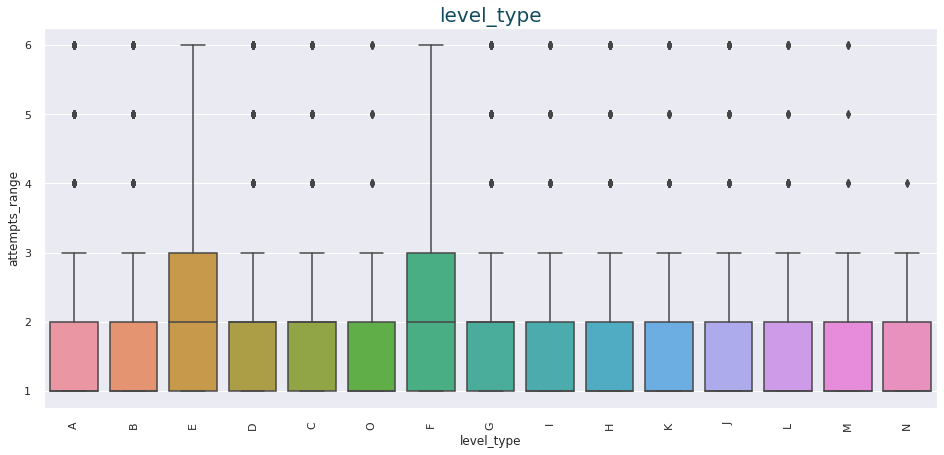

In [ ]:
#sns.color_palette("dark:salmon_r", as_cmap=True)
for col in cat_features:
    fig, ax = plt.subplots(1, 1)
    sns.boxplot(
        ax= ax,
        data=df,
        x=col,
        y="attempts_range",
     )
    ax.set_title(col, fontdict=font_title, size = 20)
    plt.xticks(rotation=90)

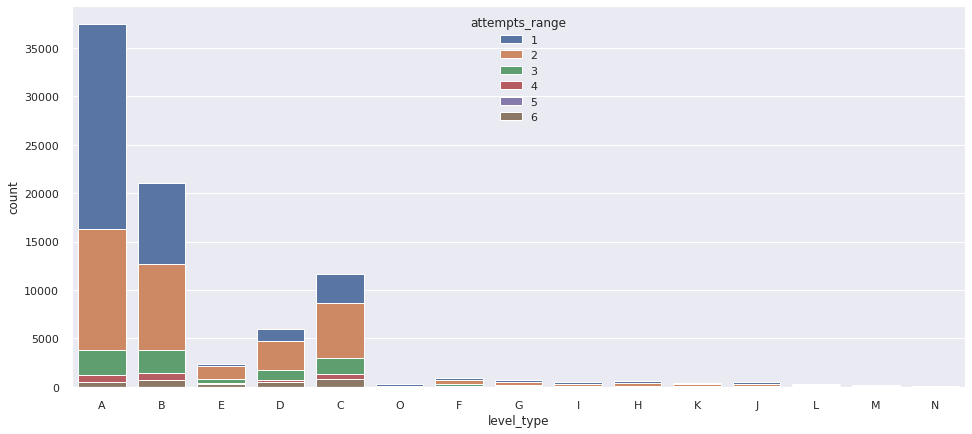

In [ ]:
sns.countplot(data=df, x="level_type", hue="attempts_range", dodge=False)
plt.show()

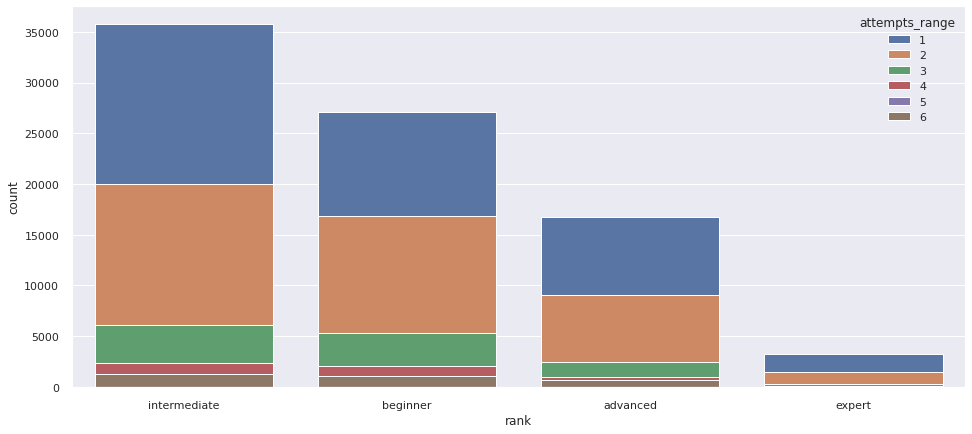

In [ ]:
sns.countplot(data=df, x="rank", hue="attempts_range", dodge=False)
plt.show()

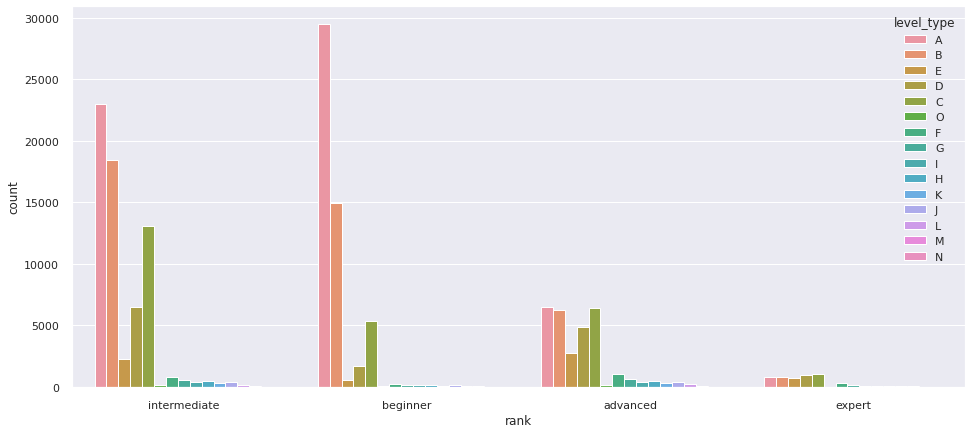

In [ ]:
sns.countplot(data=df, x="rank", hue="level_type")
plt.show()

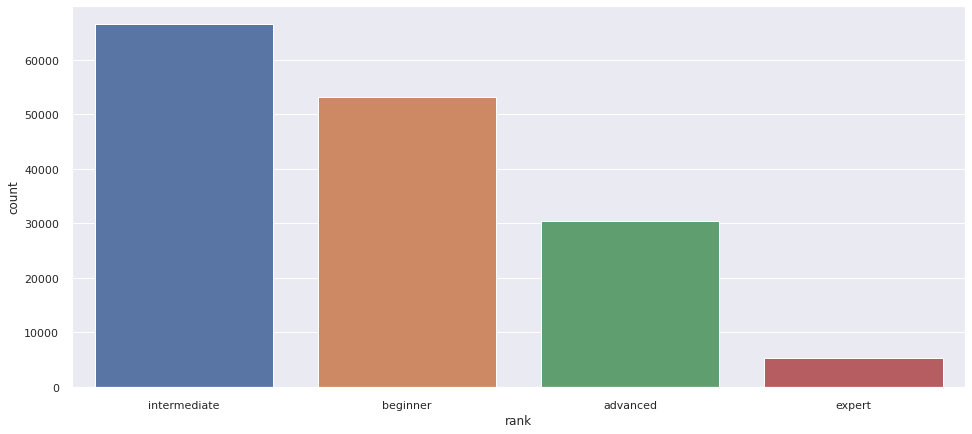

In [ ]:
sns.countplot(data=df, x="rank")
plt.show()

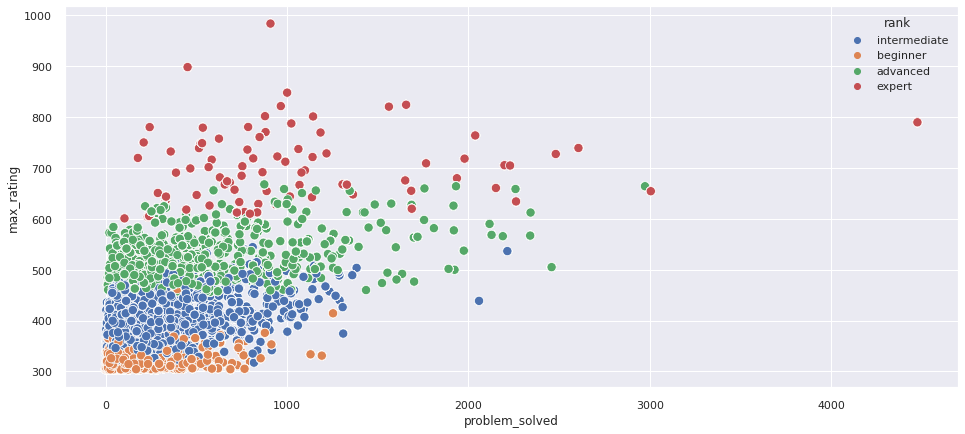

In [ ]:
#plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x='problem_solved', y='max_rating', hue='rank', s=85)
plt.show()